In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

data=pd.read_csv('1.01. Simple linear regression.csv')
data.tail()

,SAT,GPA
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


Tenemos 84 datos, el SAT es el promedio de calificaciones en el examen de admisión a la universidad, y el GPA es el promedio de calificaciones al graduarse de la universidad. Vamos hacer una regresión lineal usando statsmodel.

In [9]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


Identificamos las variables: dependiente e independiente y las declaramos...

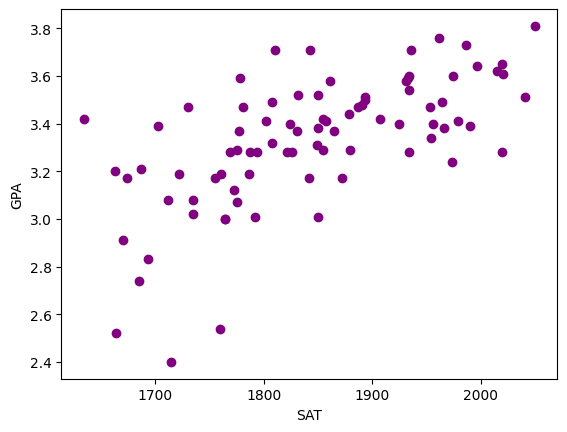

In [10]:
x=data['SAT'] # variable independiente
y=data['GPA'] # variable dependiente

plt.scatter(x,y, color='purple')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()


In [11]:
xx=sm.add_constant(x)
resultado=sm.OLS(y,xx).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        18:13:41   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El R-cuadrado muestra cuánto de la variabilidad total del conjunto de datos es explicado por tu regresión. Esto podría ser expresado como: qué tan bien tu modelo se ajusta a tus datos. R cuadrado= variabilidad explicada por la regresion(SSR)/ variabilidad  del conjunto total de datos(SST)
En esta tabla encontramos R cuadrado: Un R al cuadrado cerca de 0 indica que tu regresión no explica la variabilidad de los datos, mientras un R cuadrado de 1 significaría que el modelo explica toda la variabilidad de los datos. Ahora, ¿De cuanto es un buen R cuadrado?: aunque no tenemos la respuesta, en la fisica y quimica los cientificos buscan usualmente buscan resultados de 0.7 y 0.99, sin embargo en las ciencias sociales como economía, finanzas y psicólogia, resultados de 0.2, es decir donde el 20% de la variabilidad es explicada con el modelo, es aceptable.
En este caso tenemos un R cuadrado de 0.406, es decir, los resultados SAT explican el 41% de la variabilida de la calificaciones del GPA.
Notando que un 41% esta lejos de explicar los resultados de las notas del GPA entonces implicaría que hay otros determinantes que inciden en estos promedios, como pueden ser género o ingresos

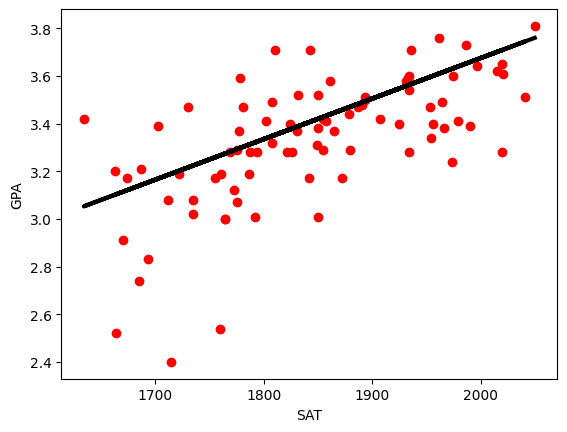

In [12]:
plt.scatter(x,y, color="red")
yhat=0.0017*x+0.275
plt.plot(x, yhat, lw=3, c='black', label='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

Vemos nuestra linea de regresión ubicada en los datos, ahora, probemos nuestro modelo y grafiquemos...

Predicted values: [2.92414118 3.08970998 3.25527879 3.42084759]


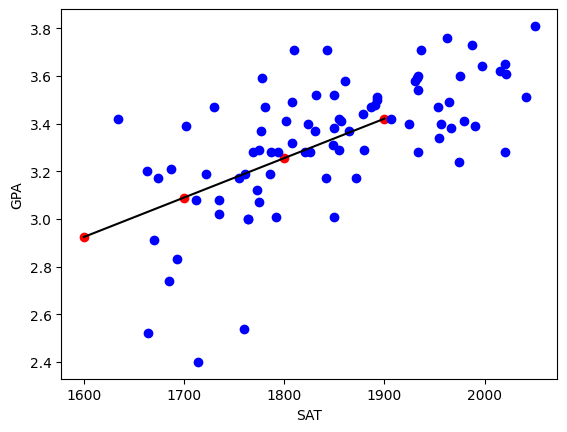

In [13]:

entrada= np.array([[1600], [1700], [1800], [1900]])

entrada_constante = sm.add_constant(entrada)

predicted_values = resultado.predict(entrada_constante)

print("Predicted values:", predicted_values)

plt.scatter(entrada, predicted_values, color='red')
plt.plot(entrada, predicted_values, color='black')
plt.scatter(x,y, color='blue')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()